Step 13: after concatenating, removing artifacts, standarization and PCA, K-means clustering is applied with clusters and analysing their results by distribution plot. In the end, K-means result with 4 clusters is add into features files as a feature.  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
no_columns = 35
subjects_n = np.arange(1,28) # 27 subjects
channels_n = 6 # number of channels

file_path = './label_11features/'
data = pd.read_csv('EEG_features.csv')
file_name = data['fname']

In [3]:
# merging the only one subject features
df_concat = np.empty((0, 35))
for fname in file_name: # one subject
    df_feat = pd.read_csv(file_path+fname)
    df_concat = np.concatenate((df_concat, df_feat), axis=0)
    
print('Shape of concatenated data frame: {}' .format(df_concat.shape))

Shape of concatenated data frame: (142020, 35)


In [4]:
# creating the dataframe of concatenated data
columns = pd.read_csv(file_path+file_name[0]).columns
df = pd.DataFrame(data = df_concat, columns=columns)

In [5]:
df_features = df[df['flag'] == 0]
X = df_features.drop(['flag', 'alpha_mean', 'theta_mean', 'delta_mean', 'label'], axis=1)
print('Shape of data frame after droping some columns: {}' .format(X.shape))
y = df_features['label']

Shape of data frame after droping some columns: (141020, 30)


In [6]:
#standarization
scaler = StandardScaler()
scaler.fit(X)
X_scale = scaler.transform(X)
print('Shape of data after standardization: {}' .format(X_scale.shape))

Shape of data after standardization: (141020, 30)


In [7]:
# applying PCA with 15 components
pca = PCA(n_components=15)
pca.fit(X_scale)
X_pca = pca.transform(X_scale)
print('Shape of 15 components of PCA: {}' .format(X_pca.shape))

Shape of 15 components of PCA: (141020, 15)


In [8]:
# computing four clusteres 
model = KMeans(n_clusters=4, random_state=1)
model.fit(X_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

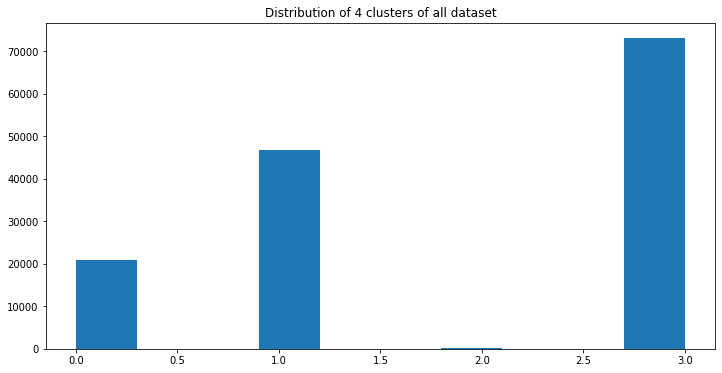

In [9]:
plt.figure(figsize=(12,6))
plt.title('Distribution of 4 clusters of all dataset')
plt.hist(model.labels_)
plt.show()

In [37]:
# adding k-means computed 4 clusters into features files 

for filen in subjects_n:
    for chn in range(channels_n):
        df_features = pd.read_csv('./label_11features/EEG0%d_0%d.csv' % (filen, chn))
        df_scalar = StandardScaler().fit_transform(df_features)
        df_pca = PCA(n_components=15).fit_transform(df_scalar)
        model = KMeans(n_clusters=4, random_state=1).fit(df_pca)
        df_features['K-means'] = model.labels_
        
        #df_features.to_csv('./ladeled 11 features with k-means feature/EEG0%d_0%d.csv' % (filen, chn), index=False) # file name (file+channel)

In [13]:
pd.read_csv('./ladeled_11features_k-means _feature/EEG01_00.csv').head()

flag  alpha_std  alpha_energy  alpha_mean  alpha_variance  alpha_skewness  \
0     0   4.255535   54328.75264    0.001756       18.109581       -0.001103   
1     0   4.305560   55613.55518   -0.002027       18.537848        0.001301   
2     0   3.478244   36294.55409    0.000578       12.098184       -0.000494   
3     0   4.324079   56093.14615   -0.007585       18.697658       -0.005248   
4     0  13.811972  572311.71830    0.001424      190.770571       -0.000300   

   alpha_Kurtosis  theta_std  theta_energy  theta_mean  ...  alpha_complexity  \
0       -0.007656   4.880030   71444.15972    0.004904  ...          1.029440   
1        0.312765   4.872064   71211.04355   -0.002998  ...          1.029798   
2        0.299030   3.431812   35332.09331    0.005538  ...          1.032629   
3        0.349342   4.270850   54720.48734   -0.002020  ...          1.027019   
4        5.492199   5.451224   89147.55919    0.003858  ...          1.028355   

   alpha_entropy  theta_mobility  theta_complexity  theta_entropy  \
0       5.197639        0.368976          1.073406       5.057941   
1       5.242967        0.360120          1.084681       5.008672   
2       5.141308        0.378076          1.073266       5.238111   
3       5.610178        0.360884          1.083648       5.260737   
4       5.132853        0.375919          1.087701       5.040102   

   delta_mobility  delta_complexity  delta_entropy  label  K-means  
0        0.125467          1.399665       4.686027      0        0  
1        0.112932          1.484439       4.784436      0        0  
2        0.095567          1.620877       4.961914      0        0  
3        0.107629          1.540559       4.936872      0        0  
4        0.100073          1.563462       4.823792      0        2  

[5 rows x 36 columns]